# Coursework1

In [1]:
'''
Created on 28 Aug 2018

@author: marta
'''
import numpy as np
import matplotlib.pyplot as plt
import h5py
import os

# Loading the dataset
os.getcwd()
train_dataset = h5py.File('trainCats.h5', "r")
trainSetX = np.array(train_dataset["train_set_x"][:]) # your train set features -- print(trainSetX.shape) -- (209, 64, 64, 3)
trainSetY = np.array(train_dataset["train_set_y"][:]) # your train set labels -- print(trainSetY.shape) -- (1, 209)
trainSetY = trainSetY.reshape((1, trainSetY.shape[0]))

test_dataset = h5py.File('testCats.h5', "r")
testSetX = np.array(test_dataset["test_set_x"][:]) # your test set features -- print(testSetX.shape) -- (50, 64, 64, 3)
testSetY = np.array(test_dataset["test_set_y"][:]) # your test set labels -- print(testSetY.shape) -- (1, 50)
testSetY = testSetY.reshape((1, testSetY.shape[0]))

classes = np.array(test_dataset["list_classes"][:]) # the list of classes

# Example of a picture
index = 20
plt.imshow(trainSetX[index])
plt.show()
print ("y = " + str(trainSetY[:, index]) + ", it's a '" + classes[np.squeeze(trainSetY[:, index])].decode("utf-8") +  "' picture.")



/Applications/Anaconda/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


<Figure size 640x480 with 1 Axes>

y = [0], it's a 'non-cat' picture.


In [2]:
# Flatten the pictures
trainSetXF= trainSetX.reshape(trainSetX.shape[0], -1).T # print(trainSetXF.shape) -- (12288, 209)
testSetXF = testSetX.reshape(testSetX.shape[0], -1).T # print(testSetXF.shape) -- (12288, 50)

# Standardise the dataset
trainSetXS = trainSetXF/255
testSetXS = testSetXF/255

# for key in train_dataset.keys():
    # print(key)
    
# for key in train_dataset.keys():
    # print(key)
    
print(trainSetXF.shape)
print(trainSetY.shape)
print(testSetXF.shape)
print(testSetY.shape)

(12288, 209)
(1, 209)
(12288, 50)
(1, 50)


In [3]:
# Define the network of structure
# m -- the number of training examples
# m_test = the number of test examples
m = trainSetXS.shape[1]
m_test = testSetXS.shape[1]
m_y_train = trainSetY.shape[1]
m_y_test = testSetY.shape[1]

In [8]:
# Initialize the model's parameters
# w -- weights
# b -- bias
# J -- cost function
# lr -- learning rate
# n_i -- the number of iteration
w = np.zeros((trainSetXS.shape[0],1))
b = 0
J = 0
lr = 0.05
n_i = 5000

In [9]:
# Activation Function: Sigmoid
# z = W^T*X+b
# s -- sigmoid function
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

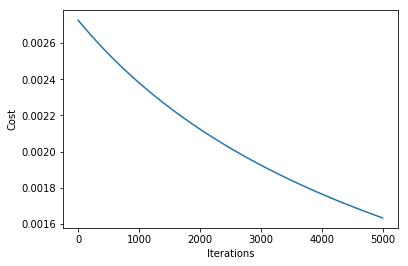

the train accuracy is  1.0
the test accuracy is  0.66
(12288, 1)
()


In [11]:
# Update the parameters
costValues = []
for i in range(n_i):
    
    # Forward propagation
    X = trainSetXS
    z = np.dot(w.T, X) + b
    a = sigmoid(z)
    
    # Cost function (J)
    Y = trainSetY
    J = -1/m * np.sum((Y * np.log(a), (1-Y) * np.log(1-a)))
    
    # Gradient Descent
    dw = 1/m * np.dot(X, (a-Y).T)
    db = 1/m * np.sum(a-Y)
    
    w = w - lr * dw
    b = b - lr * db
        
    costValues.append(J)
    
# print(costValues)

# costValues array with the costs for each iteration
plt.plot(costValues)
plt.ylabel('Cost')
plt.xlabel('Iterations')
plt.show()

# Accuracy
# y_predict_train -- the prediction of train set
# y_predict_test -- the prediction of test set

y_predict_train = sigmoid(np.dot(w.T, trainSetXF) + b)
y_predict_test = sigmoid(np.dot(w.T, testSetXF) + b)

print('the train accuracy is ', np.mean(y_predict_train == trainSetY)) # average similarity between two sets
print('the test accuracy is ', np.mean(y_predict_test == testSetY))

print(w.shape)
print(b.shape)